In [1]:
import pandas as pd
import numpy as np
import arrow
from sklearn.neighbors import NearestNeighbors
import joblib

/tmp/ipykernel_71770/2184389093.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [79]:
def read_in_data():
    included_variables = ["Popularity", "Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Tempo","Valence", "Album Release Date"]
    indy_included = included_variables + ["Index"]
    
    df = pd.read_csv("songs_data.csv", sep=',', converters={'Artist Genres': lambda x: x.split(", ")}, keep_default_na=False)
    
    #extract simpler genres
    genres = ['pop', 'rock', 'hip hop', "house", "disco", "soul", "r&b"]
    song_genres = []
    for i in range(0, df.shape[0]):
        row = str(df["Artist Genres"].values[i][0])
        song_genres.append('')
        for g in genres:
            if row.find(g) != -1:
                song_genres[i] = g
                break
    
    df["Genre"] = song_genres
    df_all = pd.read_csv("songs_data.csv")
    df_all["Genre"] = song_genres
    df_all["Index"] = df_all.index

    df_all["Album Release Date"] = pd.to_datetime(df_all["Album Release Date"], format="mixed",  errors='coerce').view('int64') 
    return df_all

In [15]:
df_all = read_in_data()
df_all.head()

/tmp/ipykernel_71770/3988880117.py:23: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df_all["Album Release Date"] = pd.to_datetime(df_all["Album Release Date"], format="mixed",  errors='coerce').view('int64')
/home/intelaipc/intel/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/home/intelaipc/intel/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/intelaipc/intel/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/intelaipc/intel/oneapi/i

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights,Genre,Index
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,712800000000000000,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic...",house,0
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,1256256000000000000,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son...",pop,1
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,916099200000000000,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC,pop,2
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,1413763200000000000,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C...",rock,3
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,-2332800000000000,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...",rock,4


In [4]:
included_variables = ["Popularity", "Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Tempo","Valence", "Album Release Date"]
indy_included = included_variables + ["Index"]
print(indy_included)

['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo', 'Valence', 'Album Release Date', 'Index']


In [6]:
def clean_and_norm(df_in):
    #normalize the data
    df_ints = pd.DataFrame(df_in, columns = indy_included)
    
    normed=(df_ints-df_ints.mean())/df_ints.std()
    normed=(df_ints-df_ints.min())/(df_ints.max()-df_ints.min())

    #clean data
    for column in indy_included:
        mean = float(normed[column].mean(skipna = True))
        normed[column] = normed[column].replace(np.NaN, mean)
    return normed

In [7]:
def knn_fit(name, data):
    #clean data
    normed = clean_and_norm(data)

    #grab normed data with only included variables
    train_data = pd.DataFrame(normed, columns = included_variables)
    train_data = train_data.iloc[1:,]
    
    knn = NearestNeighbors(metric='euclidean', algorithm='auto')
    knn.fit(train_data)

    song_i = int(data["Index"].iloc[0]) 
    test = pd.DataFrame(data, columns = included_variables)
    test = test.iloc[song_i:song_i+1:,]

    distances, indices = knn.kneighbors(test, n_neighbors=3)
    
    print(data["Track Name"].iloc[song_i], "by", data["Artist Name(s)"].iloc[song_i])
    print()
    print("Closest to:")
    
    for ind in indices[0]:
        print(data["Track Name"].iloc[ind + 1], "by", data["Artist Name(s)"].iloc[ind + 1])
    print()

    # save that model uh huh uh huh
    # load via: https://datascience.stackexchange.com/questions/52704/how-to-save-a-knn-model
    # joblib.dump(knn, name)

In [8]:
def move_knn(data, query, variable, direction):
    #clean data
    normed = clean_and_norm(data)

    #grab normed data with only included variables
    train_data = pd.DataFrame(normed, columns = included_variables)
    
    knn = NearestNeighbors(metric='euclidean', algorithm='auto')
    knn.fit(train_data)

    query_stripped = pd.DataFrame(normed, columns = included_variables)
    distances, indices = knn.kneighbors(query_stripped, n_neighbors=3)

    print("Input Song:")
    print(query["Track Name"], "by", query["Artist Name(s)"])

    # where are we going good sir
    direction_str = "more"
    if direction == 0: direction_str = "less"

    print("Our output has", direction_str, variable, "than our input:")
    ind = indices[0][0]
    print(data["Track Name"].iloc[ind + 1], "by", data["Artist Name(s)"].iloc[ind + 1])
    print()

In [9]:
def move_along(data, query_point, variable, direction):
    '''Data = input data (should be genre specific)
    query_point = current song
    variable = what are we changing? Acousticness? Loudness?
    direction = up/down (1 = up, 0 = down)'''
    filtered_data = data[data[variable].iloc[:,] > query_point[variable]]
    if direction == 0:    
        filtered_data = data[data[variable].iloc[:,] < query_point[variable]]
    
    # Ensure there is at least one point left after filtering
    if len(filtered_data) == 0:
        print("No neighbors found with a higher", variable,"value than the query point.")
    else:
        move_knn(filtered_data, query_point, variable, direction)

In [80]:
# inputs needed: index of the song
# outputs: returns index of song relative to the song csv
genre = "rock"
g_data = df_all[df_all['Genre'] == genre]

song_i = int(g_data["Index"].iloc[0]) 
query_point = g_data.iloc[song_i]

move_along(g_data, query_point, "Acousticness", 1)

Input Song:
Something About The Way You Look Tonight - Edit Version by Elton John
Our output has more Acousticness than our input:
You Can't Always Get What You Want by The Rolling Stones



In [11]:
for genre in genres:
    print(genre)
    g_data = df_all[df_all['Genre'] == genre]
    name = genre + ".pkl"
    knn_fit(name, g_data)
    print("------------------------")

pop
From the Bottom of My Broken Heart by Britney Spears

Closest to:
Beauty and the Beast - From "Beauty and the Beast" by Ariana Grande, John Legend
Talk by DJ Snake, George Maple
Good For You by Selena Gomez, A$AP Rocky

------------------------
rock
Something About The Way You Look Tonight - Edit Version by Elton John

Closest to:
Bohemian Rhapsody - Remastered 2011 by Queen
If I Were A Carpenter by Swanee
Every Woman In The World by Air Supply

------------------------
hip hop
It's Like That by Run–D.M.C., Jason Nevins

Closest to:
WITHOUT YOU by The Kid LAROI
Runnin' by 2Pac, The Notorious B.I.G.
Hey Lover by LL COOL J, Boyz II Men

------------------------
house
Justified & Ancient - Stand by the Jams by The KLF

Closest to:
Daydreamer (feat. Example) - Radio Edit by Flux Pavilion, Example
The Hitman - 7'' Mix by A.B. Logic
Don't You Want Me - Edit by Felix

------------------------
disco
Born to Be Alive - The Original by Patrick Hernandez

Closest to:
Can't Get Enough Of Your 

In [45]:
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
def visualize_tree(data, G, path, start):
    fig = plt.figure(figsize=(10, 8))
    data = pd.DataFrame(data, columns = ["Danceability","Acousticness"])
    
    # Draw the graph
    pos = {i: data.iloc[i] for i in range(len(data))}
    #nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=12)
    
    end = 2
    # Highlight the shortest path
    if path:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
    
    # Highlight start and end nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color='green', node_size=600)
    nx.draw_networkx_nodes(G, pos, nodelist=[end], node_color='red', node_size=600)
    
    # Display the plot
    plt.xlabel('Danceability')
    plt.ylabel('Acousticness')
    plt.title("k-NN Graph with Shortest Path from Start to End Points")
    plt.show()

In [101]:
def knn_graph(data, index):
    indy_data = pd.DataFrame(data, columns = indy_included)
    #clean data
    normed = clean_and_norm(data)

    #grab normed data with only included variables
    train_data = pd.DataFrame(normed, columns = included_variables)
    
    knn = NearestNeighbors(metric='euclidean', algorithm='auto', n_neighbors=5)
    knn.fit(train_data)

    distances, indices = knn.kneighbors(train_data, n_neighbors=3)

    # graphing children hehe
    G = nx.Graph()
    for i, neighbors in enumerate(indices):
        for neighbor in neighbors:
            G.add_edge(i, neighbor, weight=distances[i][np.where(neighbors == neighbor)[0][0]])

    
    start = index
    end = 2

    # Find the shortest path using Dijkstra's algorithm
    try:
        path = nx.shortest_path(G, source=start, target=end, weight='weight')
        print("Shortest path from {} to {} is: {}".format(start, end, path))
        print("Path coordinates:", [indy_data["Index"].iloc[i] for i in path])
        for ind in path:
            print(data["Track Name"].iloc[ind], "by", data["Artist Name(s)"].iloc[ind])
        
        visualize_tree(train_data, G, path, start)
    except nx.NetworkXNoPath:
        print("No path found between {} and {}".format(start, end))

Shortest path from 1 to 2 is: [1, 4075, 9573, 1525, 565, 1113, 9729, 5347, 15, 9270, 3479, 1794, 5659, 2]
Path coordinates: [1, 4075, 9573, 1525, 565, 1113, 9729, 5347, 15, 9270, 3479, 1794, 5659, 2]
I Know You Want Me (Calle Ocho) by Pitbull
Big Girl (You Are Beautiful) by MIKA
Pretty Girls by Britney Spears, Iggy Azalea
She Wants To Move by N.E.R.D
I Think I'm in Love with You by Jessica Simpson
Oh No Not You Again - Remastered by Australian Crawl
Don't Forget Me (When I'm Gone) by Glass Tiger
That's Freedom by John Farnham
Mississippi by Pussycat
Moviestar by Harpo
Hello, Goodbye - Remastered 2009 by The Beatles
Romeo's Tune by Steve Forbert
Sea of Heartbreak by Don Gibson
From the Bottom of My Broken Heart by Britney Spears


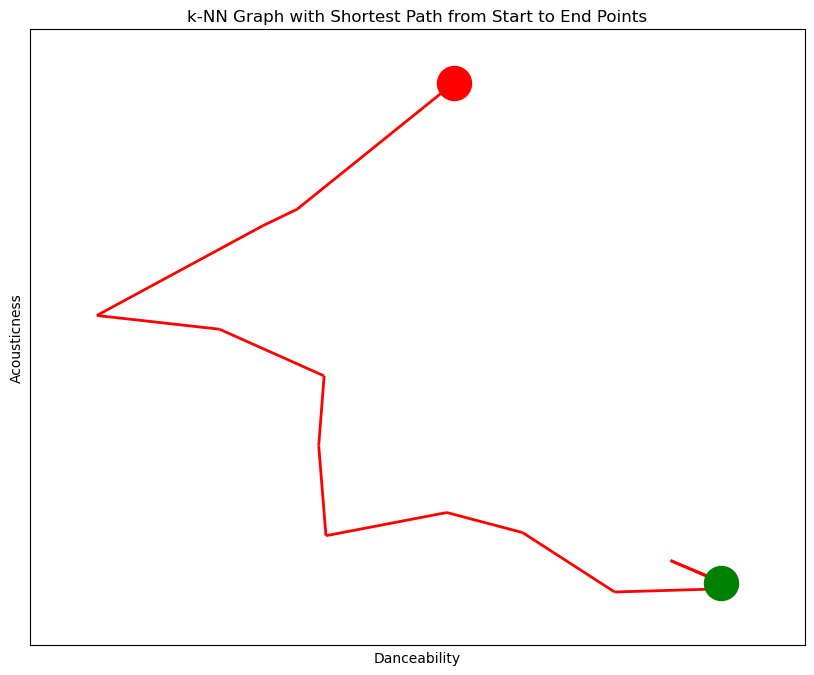

In [111]:
knn_graph(df_all, 1)

In [27]:
def run_ml(query_index, variable, direction):
    df_all = read_in_data()

    query = df_all.iloc[query_index]

    genre = query["Genre"]

    g_data = df_all[df_all['Genre'] == genre]

    move_along(g_data, query, variable, direction)

In [24]:
run_ml(2, "Energy", 1)

Input Song:
From the Bottom of My Broken Heart by Britney Spears
Our output has more Energy than our input:
Eastside (with Halsey & Khalid) by benny blanco, Halsey, Khalid



/tmp/ipykernel_71770/3988880117.py:23: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df_all["Album Release Date"] = pd.to_datetime(df_all["Album Release Date"], format="mixed",  errors='coerce').view('int64')
